In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [2]:
data = pd.read_csv('trips.csv',header='infer')

In [3]:
data.shape

(100000, 19)

In [4]:
data.nunique()

Unnamed: 0               100000
VendorID                      2
tpep_pickup_datetime      39522
tpep_dropoff_datetime     40187
passenger_count              10
trip_distance              2347
RatecodeID                    6
store_and_fwd_flag            2
PULocationID                209
DOLocationID                253
payment_type                  4
fare_amount                 447
extra                        10
mta_tax                       3
tip_amount                 1249
tolls_amount                124
improvement_surcharge         3
total_amount               2857
congestion_surcharge          5
dtype: int64

In [5]:
data.isnull().sum()

Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
dtype: int64

In [6]:
data.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,49999.500000,1.701160,1.654770,3.354837,1.090340,155.288550,152.662640,1.361570,13.546777,0.957313,0.489860,2.092456,0.345332,0.297198,19.288070,2.210760
std,28867.657797,0.457752,1.212518,3.898794,1.249878,70.370532,74.300187,0.521114,13.045715,1.136622,0.083679,3.380310,1.734992,0.040084,15.604791,0.826004
min,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-207.000000,-0.500000,-0.500000,-0.800000,-10.500000,-0.300000,-207.300000,-2.500000
25%,24999.750000,1.000000,1.000000,1.100000,1.000000,100.000000,88.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,10.800000,2.500000
50%,49999.500000,2.000000,1.000000,2.000000,1.000000,152.000000,151.000000,1.000000,9.500000,0.500000,0.500000,1.700000,0.000000,0.300000,14.760000,2.500000
75%,74999.250000,2.000000,2.000000,4.000000,1.000000,231.000000,231.000000,2.000000,16.000000,2.500000,0.500000,2.950000,0.000000,0.300000,21.960000,2.500000
max,99999.000000,2.000000,9.000000,100.150000,99.000000,265.000000,265.000000,4.000000,400.000000,3.500000,0.500000,450.000000,126.120000,0.300000,465.300000,2.750000


In [7]:
data['tpep_pickup_datetime']=pd.to_datetime(data['tpep_pickup_datetime'])
data['tpep_dropoff_datetime']=pd.to_datetime(data['tpep_dropoff_datetime'])
data.passenger_count =data.passenger_count.astype(int)

In [8]:
data.dtypes

Unnamed: 0                        int64
VendorID                        float64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int32
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                    float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
dtype: object

In [9]:
data = data.drop(data[(data['fare_amount']<=0)].index)

In [10]:
data = data.drop(data[(data['passenger_count']>6)].index)

In [11]:
data.shape

(99513, 19)

In [12]:
data.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,99513.000000,99513.000000,99513.000000,99513.000000,99513.000000,99513.000000,99513.000000,99513.000000,99513.000000,99513.000000,99513.000000,99513.000000,99513.000000,99513.000000,99513.000000,99513.000000
mean,49999.497392,1.700079,1.654568,3.362422,1.088159,155.325465,152.641373,1.352266,13.666988,0.963204,0.494277,2.101250,0.346531,0.299858,19.447483,2.230121
std,28882.751986,0.458225,1.211823,3.898588,1.249180,70.352853,74.281440,0.501909,12.871540,1.136022,0.053186,3.376805,1.731676,0.006518,15.390960,0.775777
min,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.310000,0.000000
25%,24975.000000,1.000000,1.000000,1.100000,1.000000,100.000000,88.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,11.000000,2.500000
50%,49978.000000,2.000000,1.000000,2.000000,1.000000,152.000000,151.000000,1.000000,9.500000,0.500000,0.500000,1.730000,0.000000,0.300000,14.760000,2.500000
75%,75043.000000,2.000000,2.000000,4.000000,1.000000,231.000000,231.000000,2.000000,16.000000,2.500000,0.500000,2.950000,0.000000,0.300000,21.960000,2.500000
max,99999.000000,2.000000,6.000000,100.150000,99.000000,265.000000,265.000000,4.000000,400.000000,3.500000,0.500000,450.000000,126.120000,0.300000,465.300000,2.750000


In [13]:
#change time to 3 timezone
def change(x):
    if x>=datetime.time(22, 0, 1) or x <datetime.time(4, 0, 0):
        return 'late night'
    elif x>=datetime.time(4, 0, 1) and x <datetime.time(10, 0, 0):
        return 'morning'
    elif x>=datetime.time(10, 0, 1) or x <=datetime.time(16, 0, 0):
        return 'midday'
    
data['pickup_timezone']=data['tpep_pickup_datetime'].apply(lambda x :change(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()) )
data['dropoff_timezone']=data['tpep_dropoff_datetime'].apply(lambda x :change(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()) )

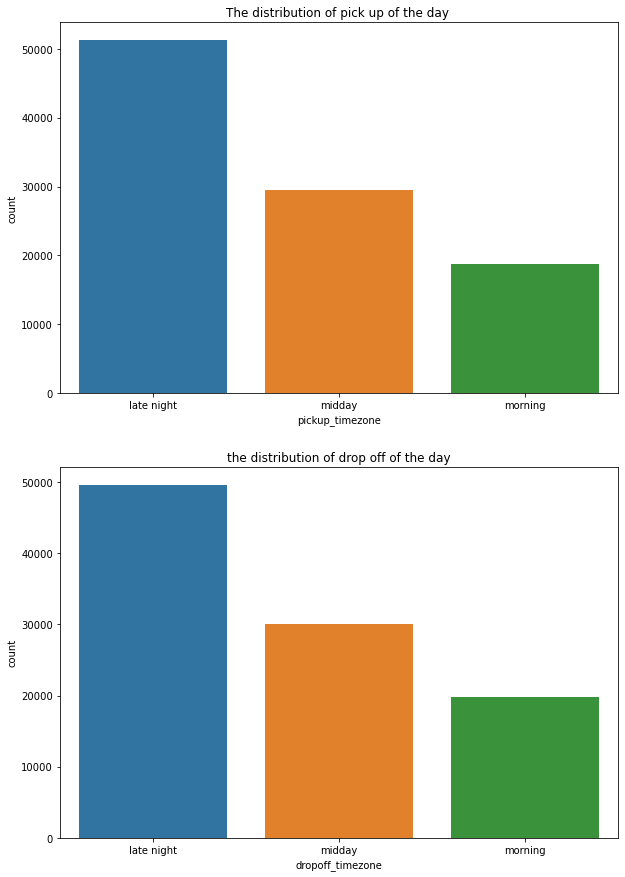

In [14]:
#Q1 Show the distribution of pick up and drop off hours of the day d
figure,ax=plt.subplots(nrows=2,ncols=1,figsize=(10,15))
sns.countplot(x='pickup_timezone',data=data,ax=ax[0])
ax[0].set_title('The distribution of pick up of the day ')
sns.countplot(x='dropoff_timezone',data=data,ax=ax[1])
ax[1].set_title('the distribution of drop off of the day')
plt.show()

In [15]:
data.groupby('dropoff_timezone').size()

dropoff_timezone
late night    49619
midday        30049
morning       19845
dtype: int64

In [16]:
data.groupby('pickup_timezone').size() 

pickup_timezone
late night    51276
midday        29443
morning       18794
dtype: int64

In [17]:
pie=data.groupby('passenger_count').size()

In [18]:
pie

passenger_count
0     1562
1    63689
2    19335
3     5587
4     3304
5     3901
6     2135
dtype: int64

Text(0.5, 1.0, 'Different Passenger Counts Showing % ')

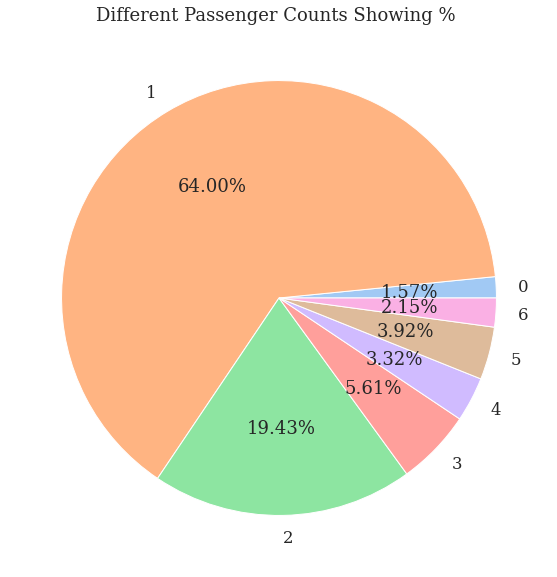

In [19]:
sns.set_theme(palette="pastel", font="serif", font_scale=1.5)

pie.plot.pie(figsize=(10,10), autopct="%.2f%%").set_ylabel('')
plt.title('Different Passenger Counts Showing % ')

Text(0.5, 1.0, 'Different Passenger Counts Showing Number of Trips ')

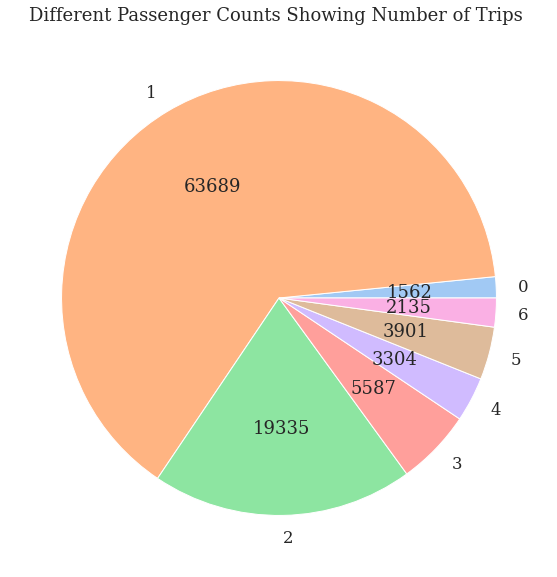

In [20]:
sns.set_theme(palette="pastel", font="serif", font_scale= 1.5)
pie.plot.pie(autopct=lambda x: '{:.0f}'.format(x*pie.sum()/100),figsize=(10,10),).set_ylabel('')
plt.title('Different Passenger Counts Showing Number of Trips ')

Text(0.5, 1.0, 'trip distance vs fare amount')

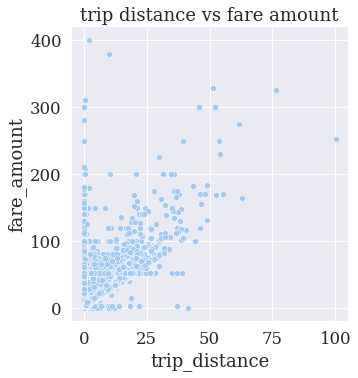

In [21]:
#Q3 Show a scatter plot of trip distance vs fare amount
sns.relplot(data=data, x='trip_distance', y='fare_amount')
plt.title('trip distance vs fare amount')
